<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [157]:
import numpy as np
from sklearn.utils import shuffle

#import train_test_split to create training and testing sets
from sklearn.model_selection import train_test_split
def load_quickdraw10(path):
    """ Function returns train and testing matrices w/ corresponding target vectors  for given data
    returns X_train,X_test, y_train,  y_test"""
    path = np.load('quickdraw10.npz')
    data = path
    X = data['arr_0']
    y = data['arr_1']
    X, y = shuffle(X, y)
    
    return train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
X_train,X_test,y_train,y_test = load_quickdraw10('quickdraw10.npz')

In [159]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((67000, 784), (67000,), (33000, 784), (33000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [160]:
#import model from tensorflow to construct basemodel
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [161]:
def create_model(lr = .01, optimizer ='adam'):
    """Returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset"""
    #instantiate model
    model = Sequential()
    model.add(
    #hidden layer
    Dense(32, activation='relu', input_dim=784))
    
    model.add(
    Dense(10,activation='softmax')
    )
    
    #compile, and use desired optimizer
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
  
    return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [162]:
model_32 = create_model()

bt_default = model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2094/2094 [==============================] - 2s 985us/step - loss: 2.6890 - accuracy: 0.3201 - val_loss: 1.7255 - val_accuracy: 0.3661
Epoch 2/25
2094/2094 [==============================] - 2s 831us/step - loss: 1.5987 - accuracy: 0.4129 - val_loss: 1.5507 - val_accuracy: 0.4195
Epoch 3/25
2094/2094 [==============================] - 2s 900us/step - loss: 1.4306 - accuracy: 0.4713 - val_loss: 1.4320 - val_accuracy: 0.4852
Epoch 4/25
2094/2094 [==============================] - 2s 824us/step - loss: 1.3123 - accuracy: 0.5113 - val_loss: 1.2950 - val_accuracy: 0.5390
Epoch 5/25
2094/2094 [==============================] - 2s 849us/step - loss: 1.2275 - accuracy: 0.5512 - val_loss: 1.2343 - val_accuracy: 0.5668
Epoch 6/25
2094/2094 [==============================] - 2s 816us/step - loss: 1.1746 - accuracy: 0.5842 - val_loss: 1.2388 - val_accuracy: 0.5599
Epoch 7/25
2094/2094 [==============================] - 2s 838us/step - loss: 1.1001 - accuracy: 0.6246 - val_loss: 1.1403 -

In [163]:
model_50 = create_model()
bt_50 = model_50.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=50,
                                validation_data=(X_test, y_test))

Epoch 1/25
1340/1340 [==============================] - 1s 943us/step - loss: 2.9145 - accuracy: 0.2283 - val_loss: 1.7957 - val_accuracy: 0.3695
Epoch 2/25
1340/1340 [==============================] - 1s 947us/step - loss: 1.6355 - accuracy: 0.3986 - val_loss: 1.5886 - val_accuracy: 0.4059
Epoch 3/25
1340/1340 [==============================] - 1s 874us/step - loss: 1.4513 - accuracy: 0.4615 - val_loss: 1.4174 - val_accuracy: 0.4757
Epoch 4/25
1340/1340 [==============================] - 1s 892us/step - loss: 1.3096 - accuracy: 0.5208 - val_loss: 1.3148 - val_accuracy: 0.5284
Epoch 5/25
1340/1340 [==============================] - 1s 873us/step - loss: 1.2234 - accuracy: 0.5556 - val_loss: 1.2497 - val_accuracy: 0.5497
Epoch 6/25
1340/1340 [==============================] - 1s 889us/step - loss: 1.1598 - accuracy: 0.5843 - val_loss: 1.1547 - val_accuracy: 0.5969
Epoch 7/25
1340/1340 [==============================] - 1s 1ms/step - loss: 1.1044 - accuracy: 0.6116 - val_loss: 1.1148 - v

In [164]:
model_70 = create_model()
bt_70 = model_70.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.6169 - accuracy: 0.2867 - val_loss: 1.7984 - val_accuracy: 0.3481
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6642 - accuracy: 0.3955 - val_loss: 1.5965 - val_accuracy: 0.4268
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4955 - accuracy: 0.4549 - val_loss: 1.4749 - val_accuracy: 0.4780
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3666 - accuracy: 0.5046 - val_loss: 1.3571 - val_accuracy: 0.5243
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2112 - accuracy: 0.5810 - val_loss: 1.2096 - val_accuracy: 0.5785
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0885 - accuracy: 0.6240 - val_loss: 1.1098 - val_accuracy: 0.6410
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0223 - accuracy: 0.6494 - val_loss: 1.0285 - val_accuracy: 0.6652
Epoch 

In [165]:
model_250 = create_model()
bt_250 = model_250.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=250,
                                validation_data=(X_test, y_test))

Epoch 1/25
268/268 [==============================] - 1s 2ms/step - loss: 6.5615 - accuracy: 0.2006 - val_loss: 2.1365 - val_accuracy: 0.2240
Epoch 2/25
268/268 [==============================] - 0s 2ms/step - loss: 1.9930 - accuracy: 0.2776 - val_loss: 1.9109 - val_accuracy: 0.3232
Epoch 3/25
268/268 [==============================] - 0s 2ms/step - loss: 1.7943 - accuracy: 0.3483 - val_loss: 1.7621 - val_accuracy: 0.3880
Epoch 4/25
268/268 [==============================] - 0s 2ms/step - loss: 1.6432 - accuracy: 0.4009 - val_loss: 1.6248 - val_accuracy: 0.4246
Epoch 5/25
268/268 [==============================] - 0s 2ms/step - loss: 1.5175 - accuracy: 0.4431 - val_loss: 1.5295 - val_accuracy: 0.4617
Epoch 6/25
268/268 [==============================] - 0s 2ms/step - loss: 1.4354 - accuracy: 0.4701 - val_loss: 1.4849 - val_accuracy: 0.4848
Epoch 7/25
268/268 [==============================] - 0s 2ms/step - loss: 1.3767 - accuracy: 0.4900 - val_loss: 1.4326 - val_accuracy: 0.4873
Epoch 

In [166]:
model_500 = create_model()
bt_500 = model_500.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=500,
                                validation_data=(X_test, y_test))

Epoch 1/25
134/134 [==============================] - 0s 3ms/step - loss: 10.1824 - accuracy: 0.2591 - val_loss: 2.0574 - val_accuracy: 0.2876
Epoch 2/25
134/134 [==============================] - 0s 3ms/step - loss: 1.9502 - accuracy: 0.3157 - val_loss: 1.8918 - val_accuracy: 0.3454
Epoch 3/25
134/134 [==============================] - 0s 2ms/step - loss: 1.7909 - accuracy: 0.3605 - val_loss: 1.7769 - val_accuracy: 0.3728
Epoch 4/25
134/134 [==============================] - 0s 2ms/step - loss: 1.6853 - accuracy: 0.3902 - val_loss: 1.7093 - val_accuracy: 0.4049
Epoch 5/25
134/134 [==============================] - 0s 2ms/step - loss: 1.6037 - accuracy: 0.4189 - val_loss: 1.6453 - val_accuracy: 0.4258
Epoch 6/25
134/134 [==============================] - 0s 2ms/step - loss: 1.5437 - accuracy: 0.4395 - val_loss: 1.6038 - val_accuracy: 0.4489
Epoch 7/25
134/134 [==============================] - 0s 2ms/step - loss: 1.4906 - accuracy: 0.4559 - val_loss: 1.5655 - val_accuracy: 0.4585
Epoch

In [167]:

#Import modules required to visualize results
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

batch_sizes = []

for exp, result in zip([bt_default, bt_50, bt_70,bt_250,bt_500], ["32_", "50_", "70_","250_","500_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head(20)

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.688982,0.320090,1.725515,0.366091,0,32_
1,1.598653,0.412910,1.550663,0.419545,1,32_
2,1.430602,0.471299,1.431983,0.485152,2,32_
3,1.312292,0.511313,1.294993,0.538970,3,32_
4,1.227528,0.551164,1.234266,0.566818,4,32_
5,1.174644,0.584209,1.238755,0.559939,5,32_
6,1.100072,0.624567,1.140254,0.648455,6,32_
7,1.048742,0.651269,1.077095,0.655939,7,32_
8,1.023314,0.660716,1.102348,0.655970,8,32_
9,0.990904,0.685149,1.016190,0.697515,9,32_


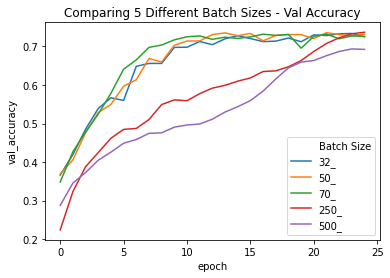

In [168]:

ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

ax.set_title('Comparing 5 Different Batch Sizes - Val Accuracy')

plt.show()

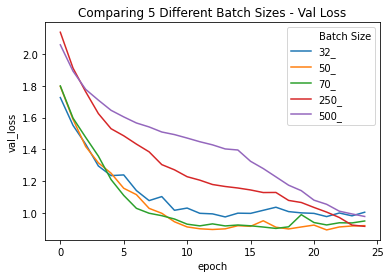

In [169]:
ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);
ax.set_title('Comparing 5 Different Batch Sizes - Val Loss')

plt.show()

# Analysis

In [170]:
#All things remaining equal,  models having optimizer Adam,with batch sizes of 35, 50,70 had the best accuracy; they were pretty close to each other.
#The model with batch size of 500 had the highest validation loss.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [171]:
#Creating 5 different experiments w/ different learning rate magnitudes

lr_1 = create_model(lr=1).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.0457 - accuracy: 0.3231 - val_loss: 1.7255 - val_accuracy: 0.3897
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6146 - accuracy: 0.4174 - val_loss: 1.5304 - val_accuracy: 0.4518
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4268 - accuracy: 0.4914 - val_loss: 1.4117 - val_accuracy: 0.4977
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2496 - accuracy: 0.5633 - val_loss: 1.2244 - val_accuracy: 0.5890
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1261 - accuracy: 0.6046 - val_loss: 1.1362 - val_accuracy: 0.6074
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0475 - accuracy: 0.6435 - val_loss: 1.0512 - val_accuracy: 0.6576
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 0.9980 - accuracy: 0.6708 - val_loss: 1.0299 - val_accuracy: 0.6767
Epoch 

In [172]:
lr_1 = create_model(lr=1).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.6031 - accuracy: 0.2951 - val_loss: 1.7530 - val_accuracy: 0.3723
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6231 - accuracy: 0.4256 - val_loss: 1.5497 - val_accuracy: 0.4534
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4078 - accuracy: 0.5151 - val_loss: 1.3736 - val_accuracy: 0.5417
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2412 - accuracy: 0.5806 - val_loss: 1.2449 - val_accuracy: 0.5917
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1440 - accuracy: 0.6214 - val_loss: 1.1319 - val_accuracy: 0.6460
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0684 - accuracy: 0.6559 - val_loss: 1.0977 - val_accuracy: 0.6714
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0287 - accuracy: 0.6719 - val_loss: 1.0442 - val_accuracy: 0.6847
Epoch 

In [173]:
lr_pt1 = create_model(lr=.1).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test))

Epoch 1/25
958/958 [==============================] - 2s 2ms/step - loss: 3.3037 - accuracy: 0.2746 - val_loss: 1.7710 - val_accuracy: 0.3395
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6678 - accuracy: 0.3818 - val_loss: 1.6201 - val_accuracy: 0.4040
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.5012 - accuracy: 0.4401 - val_loss: 1.4728 - val_accuracy: 0.4577
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3574 - accuracy: 0.5007 - val_loss: 1.3167 - val_accuracy: 0.5442
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2149 - accuracy: 0.5737 - val_loss: 1.2142 - val_accuracy: 0.6058
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1355 - accuracy: 0.6172 - val_loss: 1.1906 - val_accuracy: 0.6020
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0703 - accuracy: 0.6457 - val_loss: 1.0975 - val_accuracy: 0.6535
Epoch 

In [174]:
lr_pt01 = create_model(lr=.01).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.1571 - accuracy: 0.2711 - val_loss: 1.7976 - val_accuracy: 0.3526
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.7198 - accuracy: 0.3801 - val_loss: 1.5978 - val_accuracy: 0.4601
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4542 - accuracy: 0.4962 - val_loss: 1.3889 - val_accuracy: 0.5371
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2923 - accuracy: 0.5651 - val_loss: 1.2257 - val_accuracy: 0.5997
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1739 - accuracy: 0.6084 - val_loss: 1.1702 - val_accuracy: 0.6038
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0941 - accuracy: 0.6375 - val_loss: 1.1070 - val_accuracy: 0.6328
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0338 - accuracy: 0.6653 - val_loss: 1.0615 - val_accuracy: 0.6637
Epoch 

In [175]:
lr_pt001 = create_model(lr=.001).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.2331 - accuracy: 0.2346 - val_loss: 1.8510 - val_accuracy: 0.3163
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.7233 - accuracy: 0.3683 - val_loss: 1.6886 - val_accuracy: 0.3808
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.5671 - accuracy: 0.4284 - val_loss: 1.5412 - val_accuracy: 0.4631
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4119 - accuracy: 0.4823 - val_loss: 1.4069 - val_accuracy: 0.4961
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2827 - accuracy: 0.5318 - val_loss: 1.2869 - val_accuracy: 0.5394
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1932 - accuracy: 0.5805 - val_loss: 1.1932 - val_accuracy: 0.5857
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1416 - accuracy: 0.6118 - val_loss: 1.1394 - val_accuracy: 0.6246
Epoch 

In [176]:
lr_pt0001 = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test,y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.9742 - accuracy: 0.2239 - val_loss: 1.9211 - val_accuracy: 0.2953
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.7784 - accuracy: 0.3570 - val_loss: 1.6625 - val_accuracy: 0.4031
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.5047 - accuracy: 0.4629 - val_loss: 1.5037 - val_accuracy: 0.5045
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3491 - accuracy: 0.5277 - val_loss: 1.3228 - val_accuracy: 0.5669
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2135 - accuracy: 0.5831 - val_loss: 1.1984 - val_accuracy: 0.6064
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1265 - accuracy: 0.6118 - val_loss: 1.1385 - val_accuracy: 0.6192
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0741 - accuracy: 0.6289 - val_loss: 1.0900 - val_accuracy: 0.6404
Epoch 

In [177]:
#Visualize different experiments w/ different Learning Rates
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_1,lr_pt1,lr_pt01,lr_pt001,lr_pt0001], ["1_", ".1_", '.01_', '.001_', '.0001_']):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head(1000)

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,3.603052,0.295075,1.752984,0.372333,0,1_
1,1.623116,0.425597,1.549689,0.453394,1,1_
2,1.407835,0.515134,1.373635,0.541667,2,1_
3,1.241210,0.580627,1.244907,0.591727,3,1_
4,1.144023,0.621403,1.131942,0.645970,4,1_
...,...,...,...,...,...,...
20,0.862186,0.737522,0.935056,0.720273,20,.0001_
21,0.857948,0.737507,0.949386,0.726000,21,.0001_
22,0.861952,0.736164,0.935455,0.722818,22,.0001_
23,0.857259,0.737224,0.933592,0.730091,23,.0001_


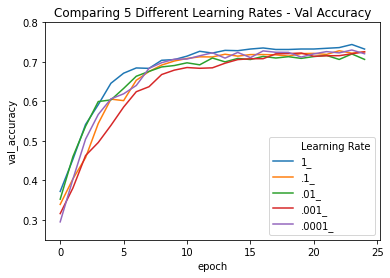

In [178]:
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df)

ax.set_title('Comparing 5 Different Learning Rates - Val Accuracy')
ax.set(ylim=(.25, .80))

plt.show()

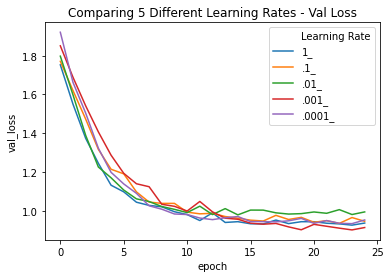

In [179]:
ax = sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df)

ax.set_title('Comparing 5 Different Learning Rates - Val Loss')

plt.show()

# Analysis

In [180]:
#All things remaining equal it seems that a learning rate of .01 contribute to the best model
# with the highest accuracy.
#On the other hand, a learning rate of .0001 resulted with a model with the highest validation loss

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [181]:
model_adadelta = create_model(optimizer='Adadelta')
bt_adadelta = model_adadelta.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.4635 - accuracy: 0.3021 - val_loss: 1.7200 - val_accuracy: 0.4122
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.5390 - accuracy: 0.4554 - val_loss: 1.4673 - val_accuracy: 0.4714
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3839 - accuracy: 0.5003 - val_loss: 1.4014 - val_accuracy: 0.4923
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2876 - accuracy: 0.5377 - val_loss: 1.3246 - val_accuracy: 0.5260
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2088 - accuracy: 0.5755 - val_loss: 1.2141 - val_accuracy: 0.5822
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1455 - accuracy: 0.6026 - val_loss: 1.1747 - val_accuracy: 0.6123
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0907 - accuracy: 0.6271 - val_loss: 1.1001 - val_accuracy: 0.6454
Epoch 

In [182]:
model_adam = create_model(optimizer='Adam')
bt_adam = model_adam.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.7229 - accuracy: 0.2535 - val_loss: 1.8739 - val_accuracy: 0.3169
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6695 - accuracy: 0.3932 - val_loss: 1.5866 - val_accuracy: 0.4450
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4761 - accuracy: 0.4637 - val_loss: 1.4923 - val_accuracy: 0.4711
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3393 - accuracy: 0.5200 - val_loss: 1.3714 - val_accuracy: 0.5392
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2159 - accuracy: 0.5643 - val_loss: 1.2863 - val_accuracy: 0.5637
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1551 - accuracy: 0.5878 - val_loss: 1.2322 - val_accuracy: 0.5864
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1001 - accuracy: 0.6138 - val_loss: 1.1495 - val_accuracy: 0.6070
Epoch 

In [183]:
model_adagrad = create_model(optimizer='Adagrad')
bt_adagrad = model_adagrad.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.6857 - accuracy: 0.2915 - val_loss: 1.8016 - val_accuracy: 0.3436
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.6765 - accuracy: 0.3856 - val_loss: 1.6453 - val_accuracy: 0.4157
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4877 - accuracy: 0.4624 - val_loss: 1.4802 - val_accuracy: 0.4731
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3480 - accuracy: 0.5199 - val_loss: 1.3851 - val_accuracy: 0.5315
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2216 - accuracy: 0.5622 - val_loss: 1.2382 - val_accuracy: 0.5668
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1461 - accuracy: 0.5905 - val_loss: 1.1849 - val_accuracy: 0.6052
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.0827 - accuracy: 0.6287 - val_loss: 1.1306 - val_accuracy: 0.6327
Epoch 

In [184]:
model_adamax = create_model(optimizer='Adamax')
bt_adamax = model_adamax.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 3.0056 - accuracy: 0.2353 - val_loss: 1.9519 - val_accuracy: 0.2837
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.7969 - accuracy: 0.3463 - val_loss: 1.7140 - val_accuracy: 0.4115
Epoch 3/25
958/958 [==============================] - 2s 2ms/step - loss: 1.5389 - accuracy: 0.4373 - val_loss: 1.5364 - val_accuracy: 0.4660
Epoch 4/25
958/958 [==============================] - 2s 2ms/step - loss: 1.3517 - accuracy: 0.5095 - val_loss: 1.3311 - val_accuracy: 0.5401
Epoch 5/25
958/958 [==============================] - 2s 2ms/step - loss: 1.2192 - accuracy: 0.5604 - val_loss: 1.2235 - val_accuracy: 0.5762
Epoch 6/25
958/958 [==============================] - 1s 2ms/step - loss: 1.1235 - accuracy: 0.6099 - val_loss: 1.1443 - val_accuracy: 0.6339
Epoch 7/25
958/958 [==============================] - 2s 2ms/step - loss: 1.0690 - accuracy: 0.6327 - val_loss: 1.1005 - val_accuracy: 0.6386
Epoch 

In [185]:
model_SGD = create_model(optimizer='Adamax')
bt_SGD = model_SGD.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=70,
                                validation_data=(X_test, y_test))

Epoch 1/25
958/958 [==============================] - 1s 1ms/step - loss: 2.9891 - accuracy: 0.3143 - val_loss: 1.6682 - val_accuracy: 0.4036
Epoch 2/25
958/958 [==============================] - 1s 1ms/step - loss: 1.5602 - accuracy: 0.4245 - val_loss: 1.5428 - val_accuracy: 0.4395
Epoch 3/25
958/958 [==============================] - 1s 1ms/step - loss: 1.4292 - accuracy: 0.4697 - val_loss: 1.4842 - val_accuracy: 0.4628
Epoch 4/25
958/958 [==============================] - 1s 1ms/step - loss: 1.3438 - accuracy: 0.5061 - val_loss: 1.3769 - val_accuracy: 0.5073
Epoch 5/25
958/958 [==============================] - 1s 1ms/step - loss: 1.2670 - accuracy: 0.5398 - val_loss: 1.3148 - val_accuracy: 0.5347
Epoch 6/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1952 - accuracy: 0.5677 - val_loss: 1.2318 - val_accuracy: 0.5772
Epoch 7/25
958/958 [==============================] - 1s 1ms/step - loss: 1.1009 - accuracy: 0.6098 - val_loss: 1.1336 - val_accuracy: 0.6332
Epoch 

In [186]:
#Import modules required to visualize results
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

batch_sizes = []

for exp, result in zip([bt_adadelta, bt_adam, bt_adagrad,bt_adamax,bt_SGD], ["Adadelta", "Adam", "Adagrad","Adamax","SGD"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['optimizer'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['optimizer'] = df['optimizer'].astype('str')
df.head(20)

,loss,accuracy,val_loss,val_accuracy,epoch,optimizer
0,3.463497,0.302119,1.720015,0.412242,0,Adadelta
1,1.539008,0.455418,1.467309,0.471364,1,Adadelta
2,1.383909,0.500299,1.401397,0.492303,2,Adadelta
3,1.287622,0.537657,1.324563,0.525970,3,Adadelta
4,1.208807,0.575507,1.214074,0.582182,4,Adadelta
5,1.145519,0.602612,1.174717,0.612333,5,Adadelta
6,1.090702,0.627104,1.100101,0.645394,6,Adadelta
7,1.048168,0.652299,1.095389,0.654091,7,Adadelta
8,1.009250,0.672776,1.036841,0.679000,8,Adadelta
9,0.980865,0.688881,1.018983,0.677212,9,Adadelta


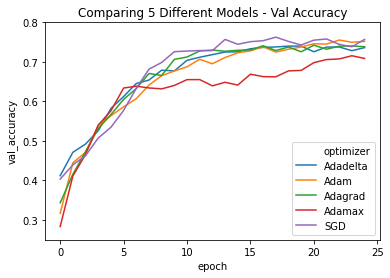

In [187]:
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='optimizer', data=df)

ax.set_title('Comparing 5 Different Models - Val Accuracy')
ax.set(ylim=(.25, .80))

plt.show()

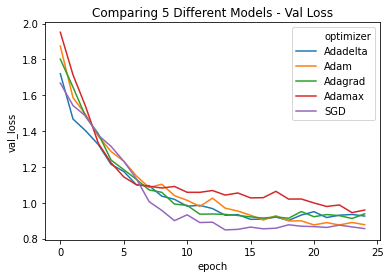

In [188]:
ax = sns.lineplot(x='epoch', y='val_loss', hue='optimizer', data=df);
ax.set_title('Comparing 5 Different Models - Val Loss')
plt.show()

# Analysis

In [189]:
# It seems that everything else  remaining equal (epoch, learning rate etc.) the model that performed that best was the SGD
# On the otherhand, the model with the highest Val loss seems to be the Adamax model

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



In [190]:
# Is a process involving computing the gradient backwards from the neuronetwork, all while with respect to the neuronetwork; 

#Additional Explanation:
#"The "backwards" part of the name stems from the fact that calculation of the gradient proceeds backwards through the network, with the gradient of the final layer of weights being
# calculated first and the gradient of the first layer of weights being calculated last. Partial computations of the gradient from one layer are reused in the computation of the gradient
# for the previous layer. This backwards flow of the error information allows for efficient computation of the gradient at each layer versus the naive approach of calculating the
# gradient of each layer separately." https://brilliant.org/wiki/backpropagation/

## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


